# Разведочный анализ данных (EDA)

In [53]:
import pandas as pd
import json
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MultiLabelBinarizer

%matplotlib inline
# !gdown --id 12ZK2_dILTS_22sNFtIOT7MjaojKPOQoo
# !gdown --id 1TeAXhAVS7TjFVpibo1Td_i-Xo5ZW3kt2

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 10
pd.options.display.min_rows = 10

COURSE = {"RUR": 1, "USD": 59.74, "EUR": 59.53, "KZT": 0.1254}  # курс валют на 23.08.2022

## 1. Оценка первого датасета.

In [76]:
df_may = pd.read_excel('region roles (26.05.22).xlsx')

In [77]:
df_may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                69656 non-null  int64  
 1   id                        69656 non-null  int64  
 2   premium                   69656 non-null  bool   
 3   name                      69656 non-null  object 
 4   department                5263 non-null   object 
 5   has_test                  69656 non-null  bool   
 6   response_letter_required  69656 non-null  bool   
 7   area                      69656 non-null  object 
 8   salary                    37590 non-null  object 
 9   type                      69656 non-null  object 
 10  address                   40318 non-null  object 
 11  response_url              1 non-null      object 
 12  sort_point_distance       0 non-null      float64
 13  published_at              69656 non-null  object 
 14  create

In [78]:
df_may.head(5)

,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,working_days,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region,immediate_redirect_url
0,0,49059633,False,Младший специалист ручного тестирования,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.172', 'name': 'Начальный уровень, М...",Астраханская область,NaN
1,1,54653519,False,Тестировщик.Net,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<p><em><strong>Мы ищем талантливого и амбициоз...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN
2,2,55116066,False,Пентестер,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<p>Лидер на рынке систем информационной безопа...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN
3,3,54031261,False,Ведущий Специалист по информационным технологиям,"{'id': 'pochta-4352-office', 'name': '«Почта Р...",False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 26000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<ul> <li>Администрирование компьютерной сети</...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,NaN
4,4,55243040,False,Специалист по защите информации,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 20000, 'to': 20000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<strong>Обязанности:</strong> <ul> <li>Обеспеч...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,NaN


#### Имеются пропуски в данных, большая часть данных в нечитаемом виде.

## 2. Очистка признаков.

In [79]:
# Удаляем неинформативные столбцы.
df_may.drop(df_may[df_may["archived"] == True].index, axis=0, inplace=True)
df_may = df_may[['name', 'salary',
       'schedule', 'experience', 'key_skills',
       'specializations', 'region']]

In [80]:
df_may.head(5)

,name,salary,schedule,experience,key_skills,specializations,region
0,Младший специалист ручного тестирования,NaN,"{'id': 'remote', 'name': 'Удаленная работа'}","{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.172', 'name': 'Начальный уровень, М...",Астраханская область
1,Тестировщик.Net,"{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область
2,Пентестер,NaN,"{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область
3,Ведущий Специалист по информационным технологиям,"{'from': 26000, 'to': None, 'currency': 'RUR',...","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область
4,Специалист по защите информации,"{'from': 20000, 'to': 20000, 'currency': 'RUR'...","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область


In [81]:
def specializations(data):
    result = []
    for spec in eval(data):
        result.append((spec["name"], spec["profarea_name"]))
    return tuple(result)


def salary_eval(data):
    if data is np.nan:
        return np.nan
    try:
        salary = ast.literal_eval(data)
    except:
        return np.nan
    if not isinstance(salary, dict):
        return np.nan
    salary_min = np.nan if salary.get("from") is None else salary["from"] * COURSE[salary["currency"]]
    salary_max = np.nan if salary.get("to") is None else salary["to"] * COURSE[salary["currency"]]
    salary = np.array( [salary_min, salary_max] )
    return salary[~np.isnan(salary)].mean()


df_may["key_skills"] = df_may["key_skills"].apply(lambda x: tuple([name["name"] for name in eval(x)]))
df_may["experience"] = df_may["experience"].apply(lambda x: ast.literal_eval(x)["name"])
df_may["schedule"] = df_may["schedule"].apply(lambda x: ast.literal_eval(x)["name"])
df_may["specializations"] = df_may["specializations"].apply(specializations)
df_may["salary"] = df_may["salary"].apply(salary_eval)

In [82]:
# Приводим основные профессиональные навыки к одинаковому написанию.
skills_dict = {'sql': 'SQL', 'git': 'Git', 'linux': 'linux', 'python': 'Python', 'java script': 'Java Script',
               'javascript': 'Java Script', 'json': 'JSON', 'js': 'Java Script', 'xml': 'XML', '1c': '1C',
               '1 c': '1C', '1с': '1C', '1 с': '1C', 'html': 'HTML', 'css': 'CSS', 'c#': 'C#', 'с#': 'C#',
               'php': 'PHP', 'docker': 'Docker', 'rest': 'REST', 'nix': 'nix', 'ооп': 'ООП', 'jira': 'Atlassian Jira ',
               'с++': 'C++', 'c++': 'C++', 'android': 'Android', 'swift': 'Swift/iOS', 'ios': 'Swift/iOS',
               'kotlin': 'Kotlin', 'tcp': 'TCP/IP', 'информационные технологии': 'Информационные технологии',
               'информационная безопасность': 'Информационная безопасность', 'dos': 'DOS', 'java': 'Java',
               '.net': ',NET'
               }


def key_skills_transformation(data):
    result = set()
    for skill in data:
        skill = skill.lower()
        added = False
        for key in skills_dict.keys():
            if key in skill:
                added = True
                result.add(skills_dict[key])
                skill = skill.replace(key, '')
        if added == False:
            result.add(skill)
    return tuple(result)


df_may["skills"] = df_may["key_skills"].apply(key_skills_transformation)

In [83]:
df_may.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69652 entries, 0 to 69655
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             69652 non-null  object 
 1   salary           37586 non-null  float64
 2   schedule         69652 non-null  object 
 3   experience       69652 non-null  object 
 4   key_skills       69652 non-null  object 
 5   specializations  69652 non-null  object 
 6   region           69652 non-null  object 
 7   skills           69652 non-null  object 
dtypes: float64(1), object(7)
memory usage: 4.8+ MB


In [84]:
df_may.head(5)

,name,salary,schedule,experience,key_skills,specializations,region,skills
0,Младший специалист ручного тестирования,NaN,Удаленная работа,Нет опыта,(),"((Начальный уровень, Мало опыта, Информационны...",Астраханская область,()
1,Тестировщик.Net,37500.000,Полный день,От 1 года до 3 лет,"(Git, SQL, Тестирование, C#, API)","((Программирование, Разработка, Информационные...",Астраханская область,"(SQL, тестирование, C#, api, Git)"
2,Пентестер,NaN,Полный день,От 3 до 6 лет,"(SQL, Linux, Информационная безопасность, Рабо...","((Программирование, Разработка, Информационные...",Астраханская область,"(работа с базами данных, linux, Информационная..."
3,Ведущий Специалист по информационным технологиям,26000.000,Полный день,Нет опыта,"(Пользователь ПК, Работа в команде, 1С: Предпр...","((Компьютерная безопасность, Информационные те...",Астраханская область,"(администрирование серверов windows, ms outloo..."
4,Специалист по защите информации,20000.000,Полный день,Нет опыта,"(MS Dos, Диагностика ПК, Компьютер, Работа в у...","((Компьютерная безопасность, Информационные те...",Астраханская область,"(компьютер, диагностика пк, работа в условиях ..."


#### Удалили неинформативные признаки, и привели в читаемый вид необходимые для анализа.

## 3. Оценка второго датасета.

In [85]:
df_june = pd.read_excel('result roles (16.06.2022).xlsx')

In [86]:
df_june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76382 entries, 0 to 76381
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                76382 non-null  int64 
 1   id                        76382 non-null  int64 
 2   premium                   76382 non-null  bool  
 3   name                      76382 non-null  object
 4   department                4902 non-null   object
 5   has_test                  76380 non-null  object
 6   response_letter_required  76382 non-null  object
 7   area                      76381 non-null  object
 8   salary                    40874 non-null  object
 9   type                      76379 non-null  object
 10  published_at              76380 non-null  object
 11  created_at                76381 non-null  object
 12  archived                  76380 non-null  object
 13  insider_interview         570 non-null    object
 14  url                   

In [87]:
df_june.head(5)

,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,0,49059633,False,Младший специалист ручного тестирования,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,54252278,False,Пентестер,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,54428119,False,Асессор-тестировщик,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,54429041,False,Тестировщик (асессор),NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,54653519,False,Тестировщик.Net,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Имеются пропуски в данных, большая часть данных в нечитаемом виде.

## 4. Очистка признаков.

In [88]:
# Удаляем неинформативные столбцы.

df_june = df_june[['name', 'salary',
       'schedule', 'experience', 'key_skills',
       'specializations', 'region']]


In [89]:
# Преобразуем ячейки сета в удобочитаемый вид.
# Приводим основные профессиональные навыки к одинаковому написанию.

def change_experience(data):
    try:
        return ast.literal_eval(data)['name']
    except:
        return np.nan


def specializations(data):
    result = []
    try:
        for spec in eval(data):
            result.append((spec["name"], spec["profarea_name"]))
        return tuple(result)
    except:
        return tuple()


def change_skills(skills):
    try:
        return tuple(skill['name'] for skill in ast.literal_eval(skills))
    except:
        return ()


def change_schedule(data):
    try:
        return ast.literal_eval(data)['name']
    except:
        return np.nan


def salary_eval(data):
    if data is np.nan:
        return np.nan
    try:
        salary = ast.literal_eval(data)
    except:
        return np.nan
    if not isinstance(salary, dict):
        return np.nan
    salary_min = np.nan if salary.get("from") is None else salary["from"] * COURSE[salary["currency"]]
    salary_max = np.nan if salary.get("to") is None else salary["to"] * COURSE[salary["currency"]]    
    salary = np.array( [salary_min, salary_max] )
    return salary[~np.isnan(salary)].mean()


df_june['experience'] = df_june['experience'].apply(change_experience)
df_june['specializations'] = df_june['specializations'].apply(specializations)
df_june['schedule'] = df_june['schedule'].apply(change_schedule)
df_june['key_skills'] = df_june['key_skills'].apply(change_skills)
df_june['skills'] = df_june['key_skills'].apply(key_skills_transformation)
df_june['region'] = df_june['region'].where(df_june['region'].isin(df_may['region'].values), np.nan)
df_june["salary"] = df_june["salary"].apply(salary_eval)

C:\Users\kami-\AppData\Local\Temp\ipykernel_15920\359461021.py:47: RuntimeWarning: Mean of empty slice.
  return salary[~np.isnan(salary)].mean()


In [90]:
df_june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76382 entries, 0 to 76381
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             76382 non-null  object 
 1   salary           40870 non-null  float64
 2   schedule         76379 non-null  object 
 3   experience       76029 non-null  object 
 4   key_skills       76382 non-null  object 
 5   specializations  76382 non-null  object 
 6   region           76028 non-null  object 
 7   skills           76382 non-null  object 
dtypes: float64(1), object(7)
memory usage: 4.7+ MB


In [91]:
df_june.head(5)

,name,salary,schedule,experience,key_skills,specializations,region,skills
0,Младший специалист ручного тестирования,NaN,Удаленная работа,Нет опыта,(),"((Начальный уровень, Мало опыта, Информационны...",Астраханская область,()
1,Пентестер,NaN,Полный день,От 3 до 6 лет,"(SQL, Linux, Информационная безопасность, Рабо...","((Программирование, Разработка, Информационные...",Астраханская область,"(работа с базами данных, linux, Информационная..."
2,Асессор-тестировщик,NaN,Удаленная работа,Нет опыта,(),"((Программирование, Разработка, Информационные...",Астраханская область,()
3,Тестировщик (асессор),NaN,Удаленная работа,Нет опыта,(),"((Программирование, Разработка, Информационные...",Астраханская область,()
4,Тестировщик.Net,37500.000,Полный день,От 1 года до 3 лет,"(Git, SQL, Тестирование, C#, API)","((Программирование, Разработка, Информационные...",Астраханская область,"(SQL, тестирование, C#, api, Git)"


#### Удалили неинформативные признаки, и привели в читаемый вид необходимые для анализа.

## 5. Отсортируем для анализа только IT вакансии.

In [92]:
# определим имена вакансий с 3-мя и более it-навыками, соберем новые датасеты с соответсвующими именами вакансий.

def sort_it(data):
    count = 0
    for skill in set(skills_dict.values()):
        if skill in data:
            count += 1
            if count == 3:
                return True
    return False

names_1 = set(df_may[df_may["skills"].apply(sort_it)].name.values)
names_2 = set(df_june[df_june["skills"].apply(sort_it)].name.values)
it_names = names_1 | names_2 

df_may_it = df_may[df_may["name"].apply(lambda x: True if x in it_names else False)]
df_june_it = df_june[df_june["name"].apply(lambda x: True if x in it_names else False)]

df_may_notit = df_may[~df_may["name"].apply(lambda x: True if x in it_names else False)]
df_june_notit = df_june[~df_june["name"].apply(lambda x: True if x in it_names else False)]

In [94]:
# создадим лист датафремов для дальнейшей отрисовки и дадим им название.

list_df = [
    df_may_it,
    df_june_it,
    #   df_may,
    #   df_june,
    #   df_may_notit,
    #   df_june_notit,
]
list_title = ['Данные за май, среди IT специалистов', 'Данные за июнь, среди IT специалистов',
              'Все данные за май', 'Все данные за июнь',
              'Данные за май, среди не IT специалистов', 'Данные за июнь, среди не IT специалистов']

#### Оба датасета готовы для дальнейшего анализа.

## 6. Проведем графический и неграфический анализ числовых данных.

In [95]:
df_may_it.describe()

,salary
count,10076.000
mean,109472.113
std,76930.987
min,35.000
25%,50000.000
50%,89262.500
75%,150000.000
max,750000.000


In [96]:
df_june_it.describe()

,salary
count,11563.000
mean,110656.448
std,79994.188
min,35.000
25%,50000.000
50%,87000.000
75%,150000.000
max,750000.000


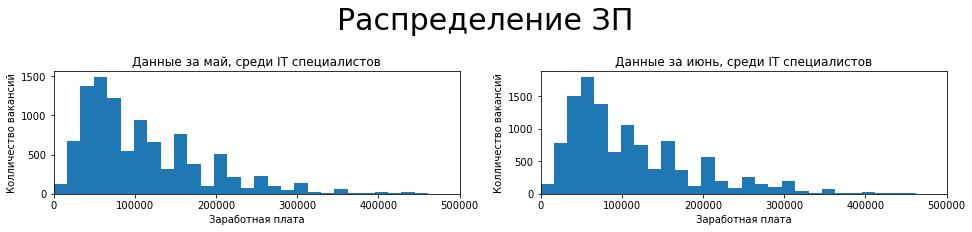

In [98]:
bins = 30

plt.figure(figsize=(16, 9))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.suptitle('Распределение ЗП', fontsize=30)

for numb in range(0, len(list_df)):
    plt.subplot(3, 2, numb + 1)
    plt.title(list_title[numb])
    plt.xlabel('Заработная плата')
    plt.ylabel('Колличество вакансий')
    plt.hist(list_df[numb].salary[list_df[numb].salary < 500_000], bins=bins, )
    plt.xlim((0, 500000))

#### Видно очень широкий диапазон зарплат обоих датасетов. Медианная зарплата обоих около 85 т.р.

## 7. Проведем анализ категориальных данных, а так же их взаимосвязь с заработной платой.

In [177]:
# Функция отрисовки статистических показателей.

def print_bplot(list_df, main_title='', sub_title=None, size=10, lim=None, order=None):
    subplt_columns = 2
    if isinstance(list_df, (pd.DataFrame, pd.Series)):
        list_df = [list_df]
        subplt_columns = 1
    if sub_title is None:
        sub_title = [''] * len(list_df)

    colors = plt.cm.tab20.colors + plt.cm.tab20b.colors + plt.cm.tab20c.colors
    color_dict = {}
    index = 0

    plt.figure(figsize=(16, 16))
    plt.subplots_adjust(wspace=0.5, hspace=0.3)
    plt.suptitle(f'{main_title} ТОП-{size}', fontsize=30)

    for numb in range(len(list_df)):

        data = list_df[numb]

        if data.iloc[:, 0].nunique() < size:
            size = data.iloc[:, 0].nunique()
        categories = data[data.columns[0]].value_counts().index[:size]

        for i in categories:
            if color_dict.get(i) is None:
                color_dict[i] = colors[index]
                index += 1
                
        order = data.set_index(data.columns[0]) \
                    .loc[categories] \
                    .groupby(level=0) \
                    .median() \
                    .sort_values(data.columns[1], ascending=False)[data.columns[1]] \
                    .index[:size]
        data = data.set_index(data.columns[0]).loc[categories]
        
        plt.subplot(3, subplt_columns, numb + 1)
        plt.title(list_title[numb])
        sns.boxplot(x=data.columns[0], y=data.index, data=data, order=order,
                    palette=[color_dict[key] for key in categories])
        plt.grid()
        plt.ylabel('')
        plt.xlabel('Заработная плата')
        plt.yticks(ticks=[i for i in range(size)], labels=categories.str[:25] if order is None else order.str[:25])
        plt.axis(xmin=0, xmax=lim)
    plt.show()

In [185]:
# Функция отрисовки диаграммы.
def print_pie(list_df, main_title=None, sub_title=None, size=10, figsize=(16, 30), legend=True):
    subplt_columns = 2
    if isinstance(list_df, (pd.DataFrame, pd.Series)):
        list_df = [list_df]
        subplt_columns = 1
    if sub_title is None:
        sub_title = [''] * len(list_df)
    explode = [0.10 for _ in range(size)]

    colors = plt.cm.tab20.colors + plt.cm.tab20b.colors + plt.cm.tab20c.colors
    color_dict = {}
    index = 0

    plt.figure(figsize=figsize)
    plt.subplots_adjust(wspace=0.5, hspace=0.3)
    if not main_title is None:
        plt.suptitle(f'{main_title} ТОП-{size}', y=0.92, fontsize=30)

    for numb in range(len(list_df)):

        plt.subplot(3, subplt_columns, numb + 1)

        data = list_df[numb].value_counts()[:size]
        labels = list_df[numb].value_counts()[:size].index

        for i in data.index:
            if color_dict.get(i) is None:
                color_dict[i] = colors[index]
                index += 1
        
        plt.pie(data, labels=['\n'.join([s[i:i + 8] for i in range(0, len(s), 8)]) for s in labels.str[:16]],
                autopct='%.1f%%', colors=[color_dict[key] for key in data.index],
                wedgeprops={'edgecolor': 'black', 'linestyle': '-', 'antialiased': True},
                labeldistance=1.15, explode=explode, shadow=True)
        plt.title(sub_title[numb], y=1.07)
        if legend:
            plt.legend(labels=labels, loc='upper center',
                       bbox_to_anchor=(0.5, -0.1), ncol=2)

    plt.show()


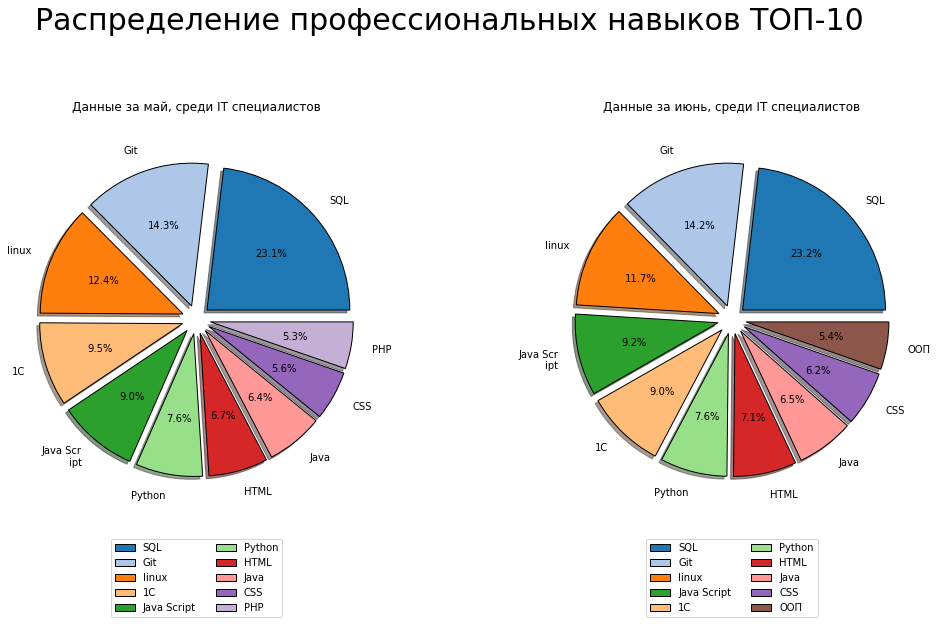

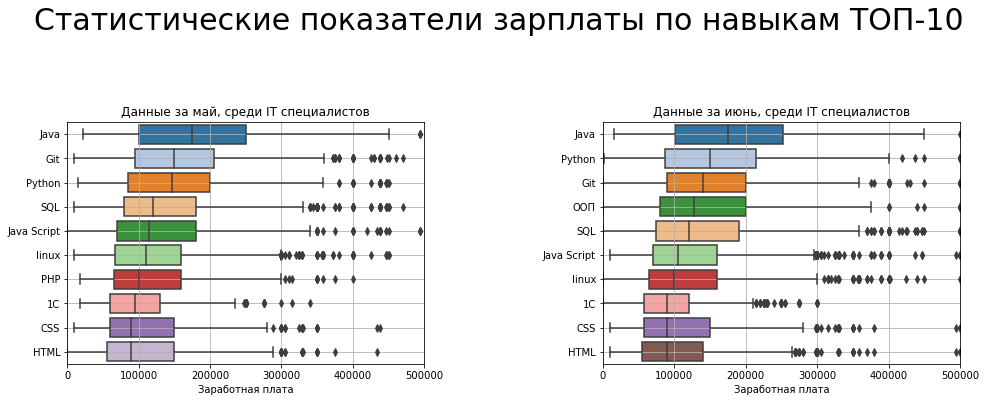

In [186]:
print_pie([df['skills'].explode() for df in list_df],
          main_title='Распределение профессиональных навыков',
          sub_title=list_title, 
          size=10)
print_bplot([df[['skills', 'salary']].explode('skills') for df in list_df],
            main_title='Статистические показатели зарплаты по навыкам',
            sub_title=list_title, 
            size=10, 
            lim=500_000)

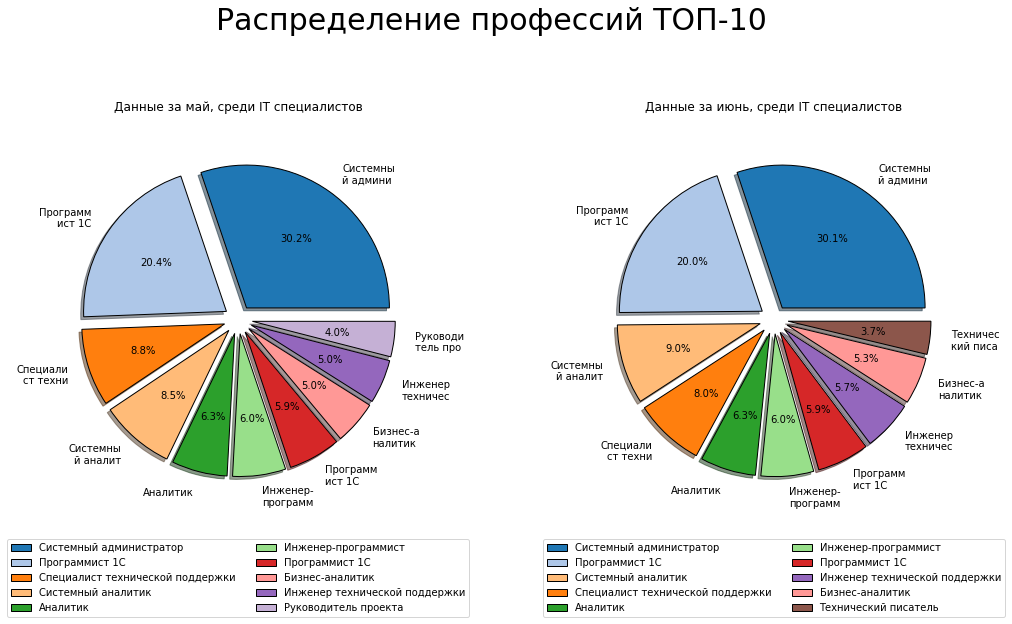

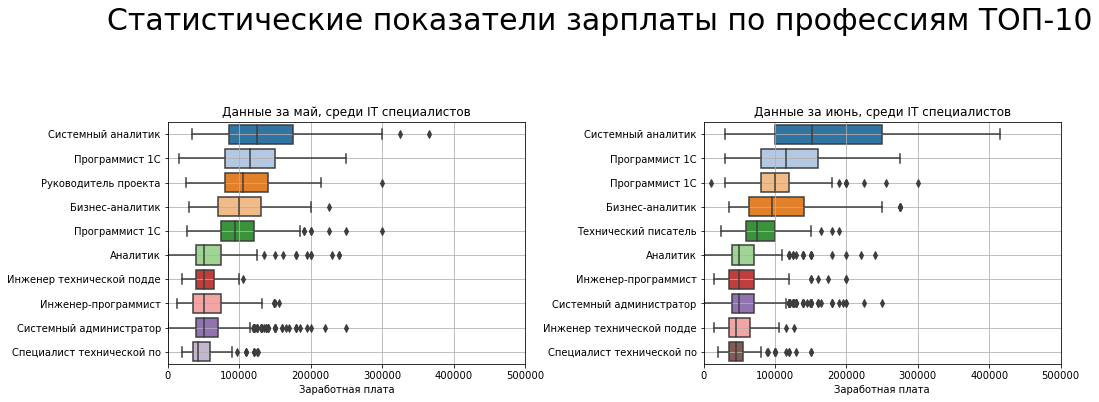

In [188]:
print_pie([df['name'] for df in list_df],
          main_title='Распределение профессий',
          sub_title=list_title,
          size=10)
print_bplot([df[['name', 'salary']] for df in list_df],
            main_title='Статистические показатели зарплаты по профессиям',
            sub_title=list_title,
            size=10,
            lim=500_000)

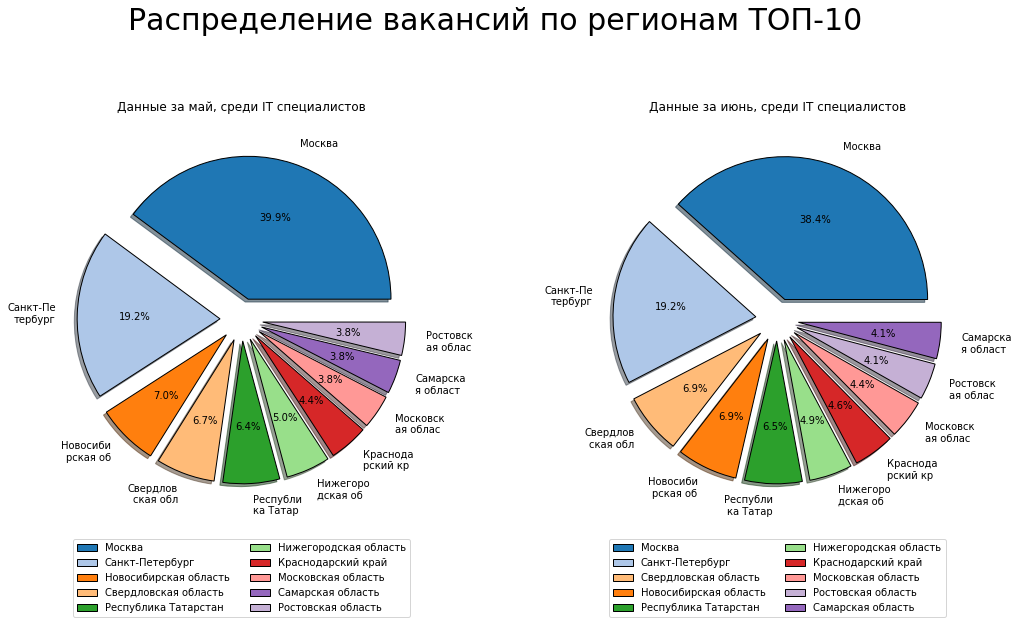

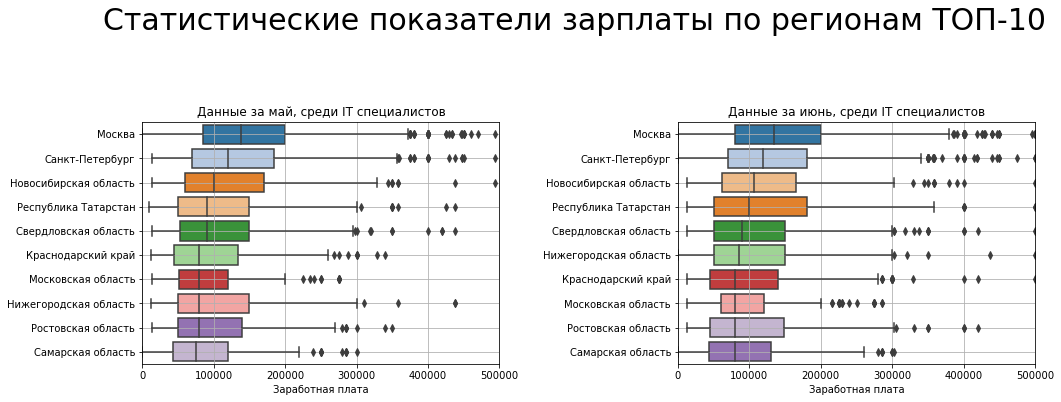

In [182]:
print_pie([df['region'] for df in list_df],
          main_title='Распределение вакансий по регионам',
          sub_title=list_title,
          size=10)
print_bplot([df[['region', 'salary']] for df in list_df],
            main_title='Статистические показатели зарплаты по регионам',
            sub_title=list_title,
            size=10,
            lim=500_000)

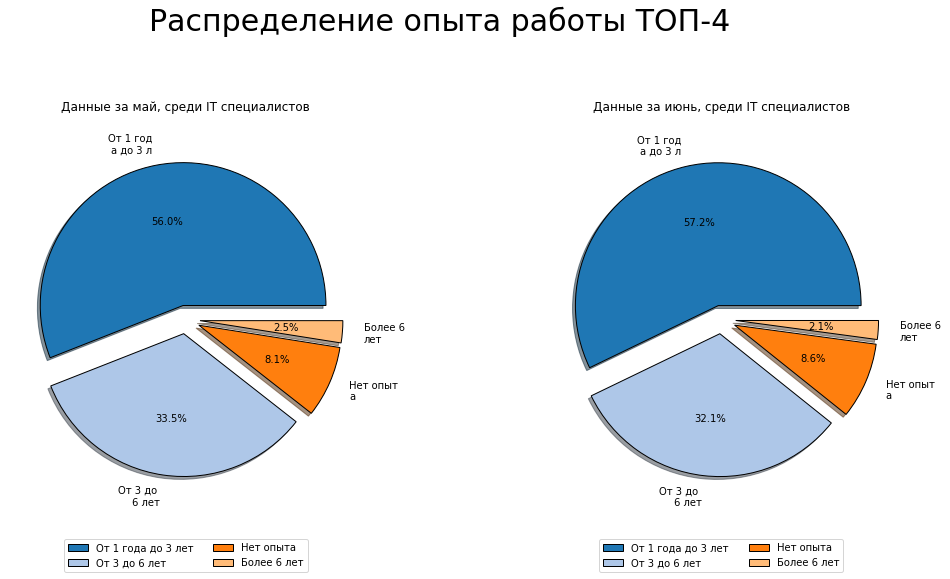

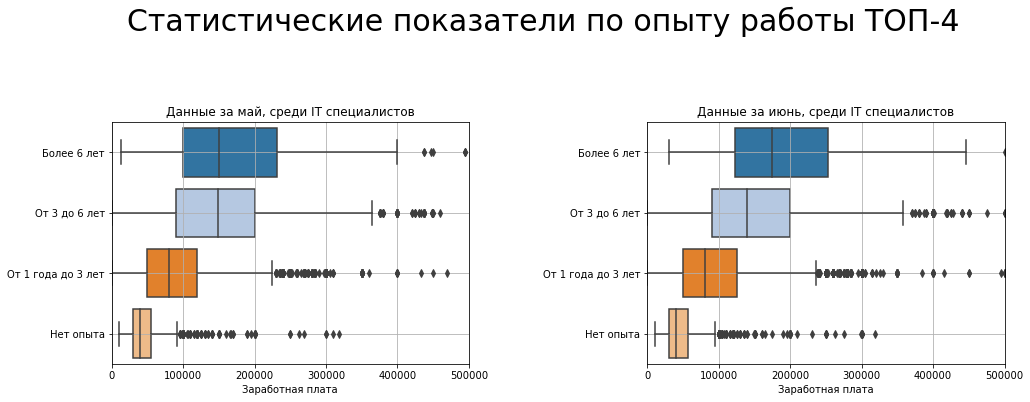

In [189]:
print_pie([df['experience'] for df in list_df],
          main_title='Распределение опыта работы',
          sub_title=list_title, size=4)
print_bplot([df[['experience', 'salary']] for df in list_df],
            main_title='Статистические показатели по опыту работы',
            sub_title=list_title, size=4, lim=500_000
            )

In [190]:
df_all = pd.concat([df_may, df_june])
df_exp = df_all[['skills', 'salary']].explode('skills')
order = df_exp.groupby('skills') \
              .filter(lambda x: x['salary'].count() > 100) \
              .groupby('skills') \
              .median() \
              .sort_values('salary', ascending=False) \
              .index[:20]

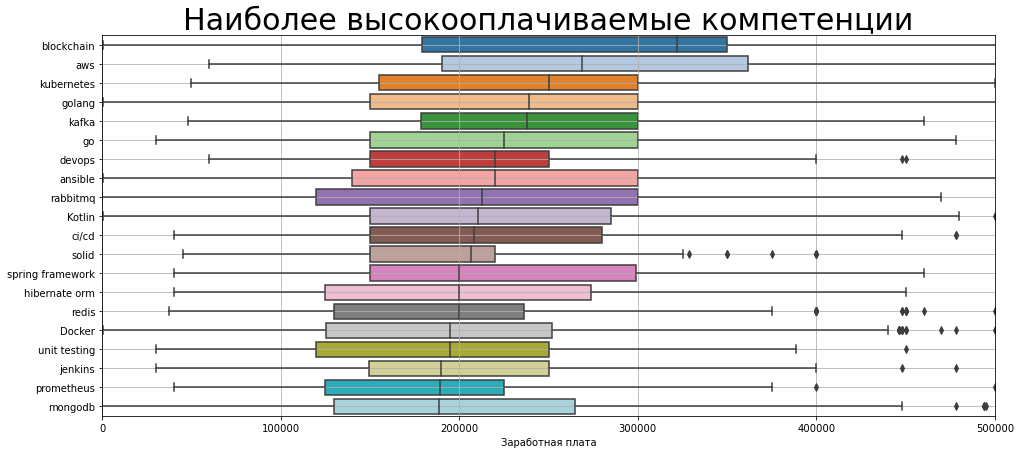

In [31]:
colors = plt.cm.tab20.colors + plt.cm.tab20b.colors + plt.cm.tab20c.colors
plt.figure(figsize=(16, 7))
sns.boxplot(x=df_exp.columns[1], y=df_exp.columns[0], data=df_exp, order=order, palette=colors)
plt.grid()
plt.title('Наиболее высокооплачиваемые компетенции', fontsize=30)
plt.ylabel('')
plt.xlabel('Заработная плата')
plt.axis(xmin=0, xmax=500_000)
plt.show()

#### Присутвуют вполне очевидные корреляции ЗП и опыта работы, средней ЗП региона. </br> Определил наиболее востребованные IT навыки. Статистические показатели ЗП для них. <br/> Посчитал среднюю ЗП для крупных регионов. <br/> Определил наиболее оплачиваемые профессиональные навыки.

## Вывод:
&emsp; Провел неграфический анализ описательных статистик количественных данных, определил медианную зарплату. Обнаружил корреляцию заработной платы и опыта работы. Выявил регионы с наиболее высокой заработной платой. Определил наиболее востребованные навыки IT специалистов. Посчитал статистические показатели заработной платы для данных навыков. Провел анализ заработной платы с наиболее оплачиваемыми навыками. Посчитал статистические показатели заработной платы для крупных регионов.

In [194]:
list_df = [
    df_may_it,
    df_june_it,
    #   df_may,
    #   df_june,
    #   df_may_notit,
    #   df_june_notit,
]
list_names = [
    'df_may_it',
    'df_june_it',
#     'df_first',
#     'df_second',
#     'df_first_notit',
#     'df_second_notit',
]

[df.to_csv(f'{list_names[i]}.csv', index=False, header=True) for i, df in enumerate(list_df)]

[None, None]